In [85]:
import numpy as np
import scipy.stats as s
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
raw_data = pd.read_csv('student.csv')
raw_data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


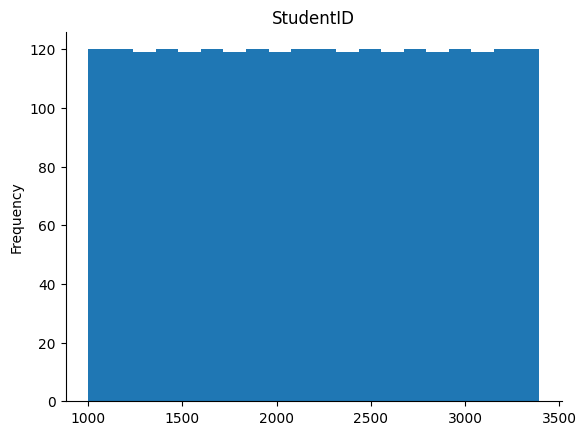

In [86]:
# @title StudentID

from matplotlib import pyplot as plt
raw_data['StudentID'].plot(kind='hist', bins=20, title='StudentID')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
raw_data.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


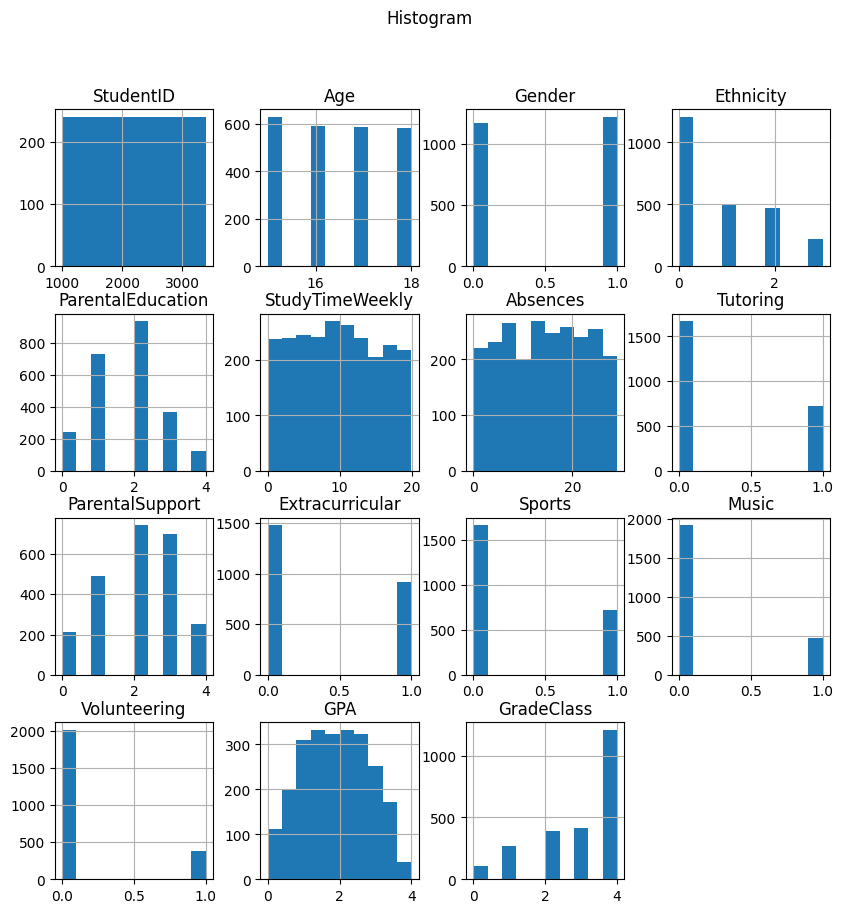

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class PrepareData:
    def __init__(self, df):
        self.col = []
        self.X_train = None
        self.X_test = None
        self.Y_train = None
        self.Y_test = None
        self.X_train_std = None
        self.X_test_std = None
        self.df = df

    def columns_to_replace(self):
        '''
        To select columns with object data type so as to convert them into integer datatype
        '''
        for i in self.df.columns:
            if self.df[i].dtype == 'O':
                self.col.append(i)

    def to_categorical(self):
        '''
        Replaces columns with object data type to integer data type
        '''
        self.columns_to_replace()
        for i in self.col:
            if self.df[i].nunique() == 2:
                self.df[i].replace(to_replace=self.df[i].unique(), value=[0, 1], inplace=True)
            elif self.df[i].nunique() == 3:
                self.df[i].replace(to_replace=self.df[i].unique(), value=[0, 1, -1], inplace=True)
            else:
                self.df[i].replace(to_replace=self.df[i].unique(), value=np.arange(0, self.df[i].nunique()), inplace=True)

    def train_test_split(self):
        '''
        Splits the data into train data and test data.
        Returns:
        X_Train-> training dataset
        X_test -> test datset
        Y_train -> training labels.
        Y_test ->testing labels
        '''
        self.to_categorical()
        number_of_rows = int(0.8 * self.df.shape[0])
        self.X_train = self.df.iloc[0:number_of_rows]
        self.Y_train = np.array(self.df[''].iloc[0:number_of_rows])
        self.Y_train = self.Y_train.reshape(self.Y_train.shape[0], 1)
        self.X_train.drop('', axis=1, inplace=True)
        self.X_test = self.df.iloc[number_of_rows:]
        self.Y_test = np.array(self.df[''].iloc[number_of_rows:])
        self.Y_test = self.Y_test.reshape(self.Y_test.shape[0], 1)
        self.X_test.drop('', axis=1, inplace=True)
        return self.X_train, self.Y_train, self.X_test, self.Y_test

    def standardize(self):
        '''
        Standardises the dataset and also adds an array of 1 in each dataset so as to facilitate the use of algorithm
        Returns:
        X_train_std-> Standardised X_train Dataset in np.array format
        X_test_Std -> Standardised X_test Dataset in np.array format
        Y_train-> training labels
        Y_test-> testing labels.
        '''
        self.X_train, self.Y_train, self.X_test, self.Y_test = self.train_test_split()
        self.X_train_std = np.array((self.X_train - self.X_train.mean()) / self.X_train.std())
        self.X_train_std = np.array(list(map(lambda x: np.append([1], x), self.X_train_std)))
        self.X_test_std = np.array((self.X_test - self.X_train.mean()) / self.X_train.std())
        self.X_test_std = np.array(list(map(lambda x: np.append([1], x), self.X_test_std)))
        self.Y_test = self.Y_test.reshape(self.Y_test.shape[0], 1)
        self.Y_train = self.Y_train.reshape(self.Y_train.shape[0], 1)
        return self.X_train_std, self.Y_train, self.X_test_std, self.Y_test

# Load the student.csv file into a Pandas DataFrame
raw_data = pd.read_csv('student.csv')

# Create an instance of the PrepareData class
prep_data = PrepareData(raw_data)

# Visualize the data
raw_data_copy = raw_data.copy()
raw_data_copy.hist(figsize=(10, 10))
plt.suptitle("Histogram")
plt.show()


In [12]:
corr = raw_data.corr()
corr

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,1.000000,-0.042255,-0.014625,-0.012990,-0.002307,0.026976,0.014841,-0.007834,0.003016,-0.003611,-0.020703,-0.005468,0.008011,-0.002697,-0.098500
Age,-0.042255,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,-0.006250
Gender,-0.014625,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,0.022998
Ethnicity,-0.012990,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,-0.023326
ParentalEducation,-0.002307,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,0.041031
StudyTimeWeekly,0.026976,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,-0.134131
Absences,0.014841,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,0.728633
Tutoring,-0.007834,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,-0.111695
ParentalSupport,0.003016,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,-0.136823
Extracurricular,-0.003611,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,-0.069733


<Axes: >

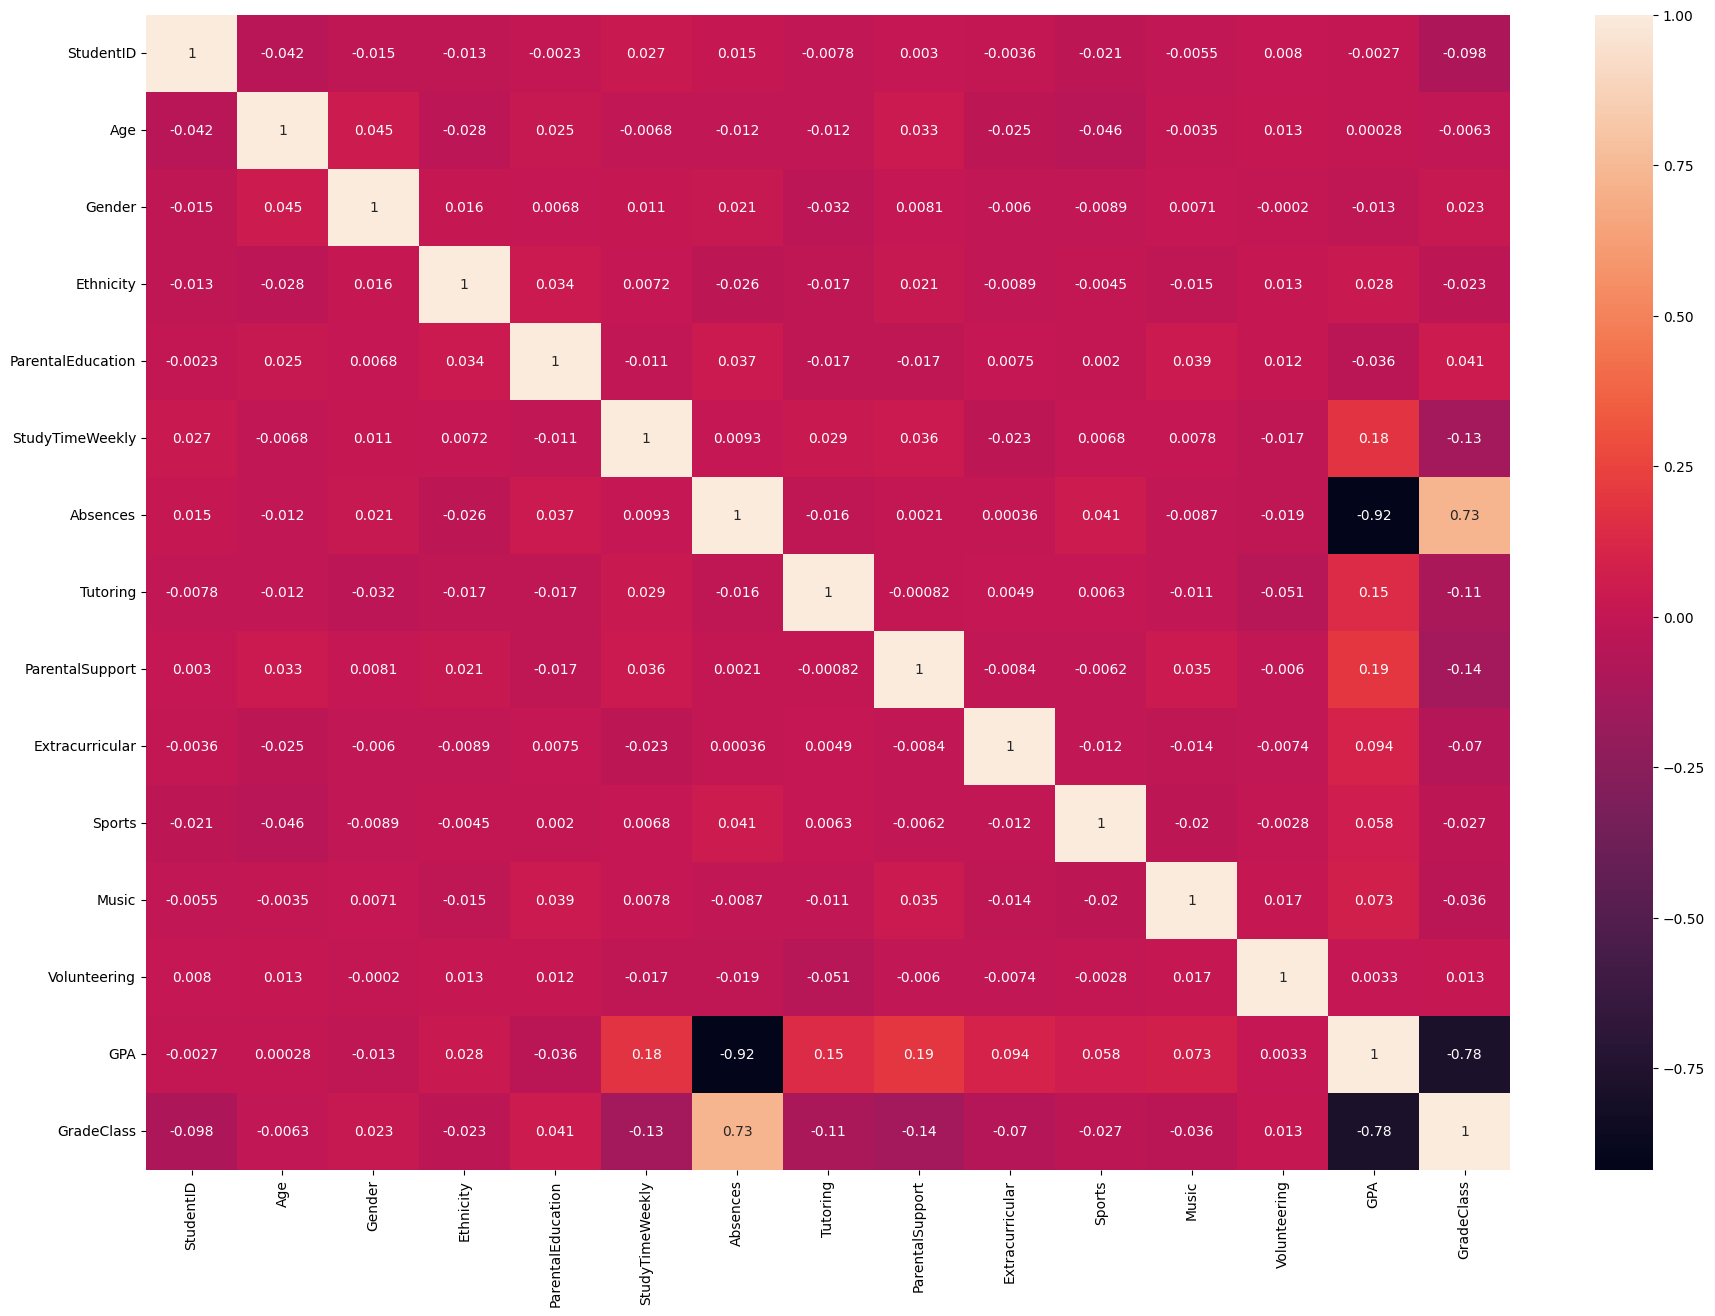

In [13]:
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(corr, annot=True, ax=ax)

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')


<Axes: xlabel='Absences', ylabel='Age'>

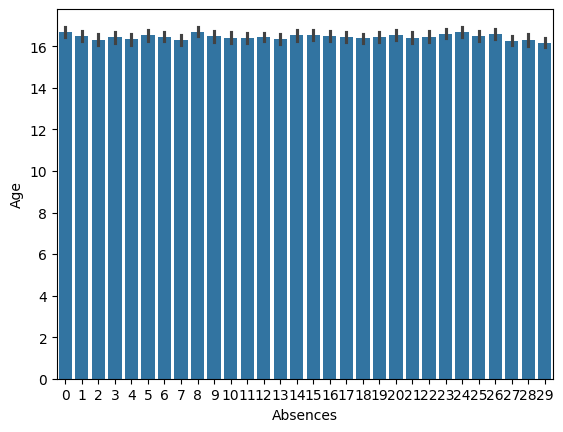

In [32]:
print(raw_data_copy.columns)
sns.barplot(x=raw_data_copy['Absences'],y=raw_data_copy['Age'])

In [48]:
raw_data = raw_data.drop(columns=['StudentID','GradeClass'])
ethnicity_mapping = {
    0: 'Caucasian',
    1: 'African American',
    2: 'Asian',
    3: 'Other'
}

raw_data['Ethnicity'] = raw_data['Ethnicity'].map(ethnicity_mapping)
raw_data['Ethnicity'].unique()
raw_data.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,1,Caucasian,2,19.833723,7,1,2,0,0,1,0,2.929196
1,18,0,Caucasian,1,15.408756,0,0,1,0,0,0,0,3.042915
2,15,0,Asian,3,4.210570,26,0,2,0,0,0,0,0.112602
3,17,1,Caucasian,3,10.028829,14,0,3,1,0,0,0,2.054218
4,17,1,Caucasian,2,4.672495,17,1,3,0,0,0,0,1.288061


In [52]:
# prompt: Using dataframe raw_data: linear regression model

import statsmodels.api as sm

# Prepare the data
X = raw_data[['StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']]
y = raw_data['GPA']

# Fit the linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     6170.
Date:                Thu, 20 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:16:22   Log-Likelihood:                 499.68
No. Observations:                2392   AIC:                            -981.4
Df Residuals:                    2383   BIC:                            -929.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.5186      0.014    1

In [60]:
def calculate_mse(y_true, y_predicted):
  """
  Calculates the mean squared error for the algorithm.
  Return:
  Value of Mean Sqaured error.
  """
  return np.mean((y_true - y_predicted)**2)

def gradient_descent(X, y, theta, alpha, iterations):
  """
  Calculate the derivative of the loss function to required to perform gradient descent.
  Return: Value of the derivative.
  ''' Uses gradient descent algorithm to update the weights
  """
  cost_history = []
  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    theta = theta - alpha * (1/len(X)) * X.T.dot(errors)
    cost_history.append(calculate_mse(y, predictions))
  return theta, cost_history

# Define the Linear_Regressor class if it's not defined elsewhere
class Linear_Regressor:
    def __init__(self, X, y, learning_rate, e):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.e = e
        self.theta_initial = np.zeros(X.shape[1])  # Initialize weights

learning_rate = 10**(-3)
e = 10**(-4)
lr = Linear_Regressor(X,y,learning_rate, e)
lr.theta_initial.shape

(8,)

In [62]:
def calculate_mse(y_true, y_predicted):
  """
  Calculates the mean squared error for the algorithm.
  Return:
  Value of Mean Sqaured error.
  """
  return np.mean((y_true - y_predicted)**2)

def gradient_descent(X, y, theta, alpha, iterations):
  """
  Calculate the derivative of the loss function to required to perform gradient descent.
  Return: Value of the derivative.
  ''' Uses gradient descent algorithm to update the weights
  """
  cost_history = []
  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    theta = theta - alpha * (1/len(X)) * X.T.dot(errors)
    cost_history.append(calculate_mse(y, predictions))
  return theta, cost_history

# Define the Linear_Regressor class if it's not defined elsewhere
class Linear_Regressor:
    def __init__(self, X, y, learning_rate, e, iterations=1000): # Added iterations parameter
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.e = e
        self.theta_initial = np.zeros(X.shape[1])  # Initialize weights
        self.iterations = iterations # Store the number of iterations
        self.theta_final, self.cost_history = self.calculate_theta_final() # Calculate and store final weights

    def calculate_theta_final(self): # New method to calculate and store final weights
        theta_final, cost_history = gradient_descent(self.X, self.y, self.theta_initial, self.learning_rate, self.iterations)
        return theta_final, cost_history

learning_rate = 10**(-3)
e = 10**(-4)
lr = Linear_Regressor(X,y,learning_rate, e)
lr.theta_final.shape

(8,)

In [64]:
y.shape
X.shape

(2392, 8)

In [67]:
def calculate_mse(y_true, y_predicted):
  """
  Calculates the mean squared error for the algorithm.
  Return:
  Value of Mean Sqaured error.
  """
  return np.mean((y_true - y_predicted)**2)

def gradient_descent(X, y, theta, alpha, iterations):
  """
  Calculate the derivative of the loss function to required to perform gradient descent.
  Return: Value of the derivative.
  ''' Uses gradient descent algorithm to update the weights
  """
  cost_history = []
  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    theta = theta - alpha * (1/len(X)) * X.T.dot(errors)
    cost_history.append(calculate_mse(y, predictions))
  return theta, cost_history

# Define the Linear_Regressor class if it's not defined elsewhere
class Linear_Regressor:
    def __init__(self, X, y, learning_rate, e, iterations=1000): # Added iterations parameter
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.e = e
        self.theta_initial = np.zeros(X.shape[1])  # Initialize weights
        self.iterations = iterations # Store the number of iterations
        self.theta_final, self.cost_history = self.calculate_theta_final() # Calculate and store final weights

    def calculate_theta_final(self): # New method to calculate and store final weights
        theta_final, cost_history = gradient_descent(self.X, self.y, self.theta_initial, self.learning_rate, self.iterations)
        return theta_final, cost_history

learning_rate = 10**(-3)
e = 10**(-4)
lr = Linear_Regressor(X,y,learning_rate, e)
# Access the calculated final weights
lr.theta_final

StudyTimeWeekly    0.111073
Absences          -0.044189
Tutoring           0.136226
ParentalSupport    0.483230
Extracurricular    0.160529
Sports             0.117626
Music              0.078894
Volunteering       0.054433
dtype: float64

In [87]:
from re import I
import numpy as np

def calculate_mse(y_true, y_predicted):
  """
  Calculates the mean squared error for the algorithm.
  Return:
  Value of Mean Squared error.
  """
  return np.mean((y_true - y_predicted)**2)

class LinearRegressor:
    def __init__(self, X, y, learning_rate, e, iterations=2000):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.e = e
        self.theta_initial = np.zeros(X.shape[1])
        self.iterations = iterations
        self.theta_final, self.cost_history = self.calculate_theta_final()

    def calculate_theta_final(self):
        theta_final, cost_history = self.gradient_descent(self.X, self.y, self.theta_initial, self.learning_rate, self.iterations)
        return theta_final, cost_history

    def gradient_descent(self, X, y, theta, alpha, iterations):
      """
      Performs gradient descent to optimize weights (theta).

      Args:
          X: Feature matrix.
          y: Target values.
          theta: Initial weights.
          alpha: Learning rate.
          iterations: Number of iterations.

      Returns:
          Optimized weights and cost history.
      """
      cost_history = []
      m = len(X)  # Number of training examples

      for i in range(iterations): # Use 'i' to track iteration number
          predictions = X.dot(theta)
          errors = predictions - y
          gradient = (1/m) * X.T.dot(errors)
          theta = theta - alpha * gradient
          cost = calculate_mse(y, predictions)
          cost_history.append(cost)

          # Print error and iteration number for each step
          print(f"Error: {cost:.4f} Iterations: {i+1}")

      return theta, cost_history

# Example usage (replace with your actual data)
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([3, 7, 11])
learning_rate = 0.01
e = 0.0001

# Create a LinearRegressor instance and perform gradient descent
lr = LinearRegressor(X, y, learning_rate, e)

# Access the calculated final weights
lr.theta_final
print(f"Error: {cost:.4f} Iterations: {I+1}")

Error: 59.6667 Iterations: 1
Error: 29.0335 Iterations: 2
Error: 14.1281 Iterations: 3
Error: 6.8756 Iterations: 4
Error: 3.3467 Iterations: 5
Error: 1.6296 Iterations: 6
Error: 0.7942 Iterations: 7
Error: 0.3876 Iterations: 8
Error: 0.1898 Iterations: 9
Error: 0.0936 Iterations: 10
Error: 0.0467 Iterations: 11
Error: 0.0240 Iterations: 12
Error: 0.0129 Iterations: 13
Error: 0.0075 Iterations: 14
Error: 0.0048 Iterations: 15
Error: 0.0036 Iterations: 16
Error: 0.0029 Iterations: 17
Error: 0.0026 Iterations: 18
Error: 0.0025 Iterations: 19
Error: 0.0024 Iterations: 20
Error: 0.0024 Iterations: 21
Error: 0.0023 Iterations: 22
Error: 0.0023 Iterations: 23
Error: 0.0023 Iterations: 24
Error: 0.0023 Iterations: 25
Error: 0.0023 Iterations: 26
Error: 0.0023 Iterations: 27
Error: 0.0023 Iterations: 28
Error: 0.0023 Iterations: 29
Error: 0.0023 Iterations: 30
Error: 0.0023 Iterations: 31
Error: 0.0023 Iterations: 32
Error: 0.0023 Iterations: 33
Error: 0.0023 Iterations: 34
Error: 0.0023 Iterat

In [88]:
lr.theta_final

array([0.97777542, 1.01754504])

In [89]:
def R2_Statistics(lr,x,y):
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((np.matmul(lr.theta_final.T,x.T)-y.reshape(y.shape[0]))**2)
    r2 = 1-(ssr/sst)
    return(r2)
R2_Statistics(lr,X,y)

0.9999933728206122